<a href="https://colab.research.google.com/github/esh04/Clickbait-Identification/blob/main/Clickbait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path = "/content/drive/MyDrive/trainData.csv"
df = pd.read_csv(path)

In [ ]:
df.drop('id', inplace=True, axis=1)

In [ ]:
df

,sentence,label
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0
...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0
41798,सबसे बड़ी आसानी के साथ। । ।\n,0


In [ ]:
sentence_list = df['sentence'].to_list()
sentence_list

['यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हेल का नमूना क्रेन द्वारा एक विशाल ट्रक पर ले जाया जाता है क्योंकि इसे चीन के एक संग्रहालय में ले जाया जा रहा है।\n',
 'जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इंस्टाग्राम रिटर्न आधिकारिक बनाता है\n',
 'रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है क्योंकि उसे तीन सेक्स आरोपों से मुक्त कर दिया गया है\n',
 'बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को गुमराह करते हुए कहा, तटकरे\n',
 'चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n',
 'नासा ने एक दृश्य जारी किया कि कैसे कार्बन डाइऑक्साइड पृथ्वी पर बढ़ रहा है और आप डरने जा रहे हैं\n',
 'कंस ने &#39;ट्रम्पकेयर&#39; की विफलता के बाद जीओपी विधायकों के दबाव के रूप में मेडिकेड का विस्तार करने के लिए कदम उठाए\n',
 'कॉनर मैकग्रेगर ने घोषणा की कि वह &#39;फ्लोयड&#39; मेवेदर और &#39;टेक ओवर बॉक्सिंग&#39; बंद कर देंगे\n',
 'ट्रिश क्लॉज़: माय आइरिस एक भयानक फोरसम की समीक्षा करते हैं\n',
 'इन 7 राज्यों में ड्राइवरों को नए साल से पहले अपने गैस टैंक भरने चाहिए\n',
 'एनबीए ऑल-स्टार गेम में बेयोंस, जे जेड और 

In [ ]:
#sentence tokens for judging
!pip install indicnlp
!pip install indic-nlp-library
from indicnlp.tokenize import indic_tokenize 

In [ ]:
no_of_tokens = []
for i in sentence_list:
  token_list = []
  for t in indic_tokenize.trivial_tokenize(i): 
    token_list.append(t)
  no_of_tokens.append(len(token_list))

In [ ]:
#add new column for analysis
df = df.assign(num_tokens = no_of_tokens)
df

,sentence,label,num_tokens
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,38
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8
...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,18
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,9


In [ ]:
break_cnt = []
for i in sentence_list:
  count = 0;
  for j in range(0,len(i)):
    if i[j] in ('!',";","?","।"):  
      count = count + 1;  
  break_cnt.append(count)

In [ ]:
df = df.assign(end_sent = break_cnt)

In [ ]:
df

,sentence,label,num_tokens,end_sent
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,38,2
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14,0
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21,0
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15,0
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8,0
...,...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,18,2
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14,0
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12,0
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,9,3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

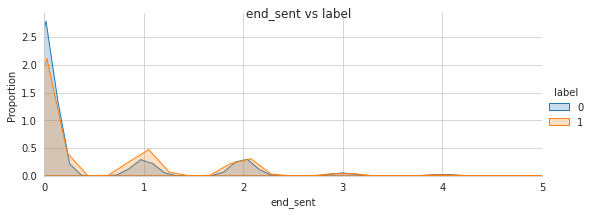

In [ ]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'end_sent',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(0, 5))
plotOne.add_legend()
plotOne.set_axis_labels('end_sent', 'Proportion')
plotOne.fig.suptitle('end_sent vs label')
plt.show()Token count